In [1]:
!pip install emoji

In [1]:
import pandas as pd
import re
from emoji import demojize

# Load the dataset
data = pd.read_csv('data/PS_test.csv')

# Tamil political context hashtags mapping from agentic System for expansion

hashtag_map = {
    "#த": "Tamil (Short form for Tamil-related content)",
    "#மக": "People or related to people",
    "#ச": "Politics or community",
    "#DMKFailsTN": "Dravida Munnetra Kazhagam fails Tamil Nadu",
    "#Seeman": "Seeman, leader of Naam Tamilar Katchi",
    "#NTK": "Naam Tamilar Katchi (Political Party)",
    "#DMK": "Dravida Munnetra Kazhagam (Political Party)",
    "#MKStalin": "MK Stalin, Chief Minister of Tamil Nadu",
    "#Mike_VoiceOfPeople": "Mic, the symbol representing the voice of the people",
    "#ந": "Tamil Nadu or South",
    "#Elections2024": "Elections 2024",
    "#BJP": "Bharatiya Janata Party",
    "#seeman": "Seeman, political leader",
    "#ADMK": "All India Anna Dravida Munnetra Kazhagam",
    "#Election2024": "Indian General Elections 2024",
    "#NTK_Symbol_Mike": "Mic, symbol of Naam Tamilar Katchi",
    "#வ": "Victory or Tamil Nadu",
    "#ntk": "Naam Tamilar Katchi",
    "#dmk": "Dravida Munnetra Kazhagam",
    "#bjp": "Bharatiya Janata Party",
    "#admk": "All India Anna Dravida Munnetra Kazhagam",
    "#ElectionCampaign": "Election Campaign Activities",
    "#Annamalai": "K. Annamalai, Tamil Nadu BJP President",
    "#LokSabhaElection2024": "Lok Sabha Election 2024",
    "#LokSabhaElections2024": "Lok Sabha Elections 2024",
    "#mkstalin": "MK Stalin, Chief Minister of Tamil Nadu",
    "#Seeman4TN": "Seeman for Tamil Nadu",
    "#edappadi": "Edappadi K. Palaniswami, Leader of AIADMK",
    "#உப": "By-elections or Deputy",
    "#NaamTamilarKatchi": "Naam Tamilar Katchi (We Tamils Party)",
    "#NewsTamil24x7": "Tamil News Updates 24x7",
    "#Edappadi": "Edappadi K. Palaniswami",
    "#Vote4INDIA": "Vote for India",
    "#ம": "Tamil Nadu or related to Tamil",
    "#ஒல": "Voice or sound",
    "#RahulGandhi": "Rahul Gandhi, Indian National Congress leader",
    "#ப": "Tamil Nadu-related",
    "#நமத": "Our",
    "#TamilNadu": "Tamil Nadu, Indian State",
    "#INDIAAlliance": "Indian National Developmental Inclusive Alliance",
    "#EPS": "Edappadi K. Palaniswami",
    "#LokSabaElection2024": "Lok Sabha Election 2024",
    "#loksabhaelection2024": "Lok Sabha Election 2024",
    "#தம": "Tamil Nadu",
    "#Congress": "Indian National Congress",
    "#DMKFails": "DMK Fails",
    "#UdhayanidhiStalin": "Udhayanidhi Stalin, Minister of Youth Welfare",
    "#annamalai": "K. Annamalai, Tamil Nadu BJP President",
    "#electioncampaign": "Election Campaign",
    "#aiadmk": "All India Anna Dravida Munnetra Kazhagam",
    "#modi": "Narendra Modi, Prime Minister of India",
    "#க": "Tamil or related content",
    "#congress": "Indian National Congress",
    "#Vote4DMK": "Vote for DMK",
    "#AIADMK": "All India Anna Dravida Munnetra Kazhagam",
    "#seemanism": "Ideologies of Seeman",
    "#Coimbatore": "Coimbatore, Tamil Nadu City",
    "#TamilNews": "Tamil News Updates",
    "#election": "Elections",
    "#PMK": "Pattali Makkal Katchi",
    "#NoVoteToDMK": "No vote to DMK",
    "#ஸ": "Sri (prefix of respect)",
    "#Seeman_Symbol_Mike": "Seeman, symbol of Mic",
    "#ஒற": "Breaking",
    "#ParliamentElection": "Indian Parliament Election",
    "#eps": "Edappadi K. Palaniswami",
    "#tamilnadu": "Tamil Nadu, Indian State",
    "#trending": "Trending News",
    "#JUSTIN": "Just In News",
    "#Modi": "Narendra Modi, Prime Minister of India",
    "#DMKAlliance": "Dravida Munnetra Kazhagam Alliance",
    "#ParliamentElection2024": "Indian Parliament Election 2024",
    "#EdappadiPalanisamy": "Edappadi K. Palaniswami, AIADMK leader",
    "#elections2024": "Indian General Elections 2024",
    "#Annamalai4Coimbatore": "Annamalai for Coimbatore",
    "#tnpolitics": "Tamil Nadu Politics",
    "#edappadipalanisamy": "Edappadi K. Palaniswami",
    "#tamilnadupolitics": "Tamil Nadu Politics",
    "#EdappadiPalaniswami": "Edappadi K. Palaniswami",
    "#Tirunelveli": "Tirunelveli, Tamil Nadu",
    "#Mike_ThePeoplesChoice": "Mic, the People's Choice",
    "#Tamilnadu": "Tamil Nadu, Indian State",
    "#NoVoteForBJP": "No Vote for BJP",
    "#DMKITWING": "DMK IT Wing",
    "#seemanspeech": "Speech by Seeman",
    "#tamildesiyam": "Tamil Nationalism",
    "#CMMKStalin": "Chief Minister MK Stalin",
    "#PMModi": "Prime Minister Modi",
    "#DravidianModel": "Dravidian Governance Model",
    "#NewsUpdate": "Latest News Update",
    "#Say_No_To_ABCD": "Say No to AIADMK, BJP, Congress, DMK",
    "#naamthamilar": "Naam Tamilar Katchi",
    "#News18TamilNadu": "News 18 Tamil Nadu",
    "#SunNews": "Sun News Tamil Channel",
    "#ntkgreenpolitics": "NTK's Green Politics",
    "#NtkforTN": "NTK for Tamil Nadu",
    "#எடப": "Edappadi",
    "#News7TamilUpdates": "News 7 Tamil Updates",
    "#seemanquotes": "Quotes from Seeman",
    "#Ntkforchange": "NTK for Change",
    "#Naaamtamilarkatchi": "Naam Tamilar Katchi",
    "#EdappadiPalanisami": "Edappadi K. Palaniswami",
    "#naamtamilarkatchi": "Naam Tamilar Katchi",
    "#News7Tamil": "News 7 Tamil",
    "#Rahul_Gandhi": "Rahul Gandhi, Congress leader",
    "#NTK4TN": "Naam Tamilar Katchi for Tamil Nadu",
    "#அத": "Athigam (Victory)",
    "#TNBJP": "Tamil Nadu BJP",
    "#newsj": "Tamil News",
    "#breakingnews": "Breaking News",
    "#seemann": "Seeman, political leader",
    "#NTK_Symbol_Mic": "Mic, symbol of Naam Tamilar Katchi",
    "#Mike_TheVoiceOfPeople": "Mic, voice of the people",
    "#EDRaid": "Enforcement Directorate Raid",
    "#loksabhaelections2024": "Lok Sabha Elections 2024",
    "#Drug_Mafia_DMK": "Drug Mafia under DMK rule",
    "#election2024": "Elections 2024",
    "#கஞ": "Kanjamalai (place or related)",
    "#politics": "Politics",
    "#ElectionsWithNews7Tamil": "Elections with News 7 Tamil",
    "#updatenews360": "Update News 360",
    "#Minnambalam": "Minnambalam Tamil News",
    "#AdmkFailsTN": "AIADMK fails Tamil Nadu",
    "#thanthitv": "Thanthi TV",
    "#NEET": "National Eligibility cum Entrance Test",
    "#rcpaulkanagaraj": "RCPaul Kanagaraj, Politician",
    "#BREAKING": "Breaking News",
    "#paulkanagaraj4northchennai": "Paul Kanagaraj for North Chennai",
    "#bjp4northchennai": "BJP for North Chennai",
    "#Politics": "Politics News",
    "#Aiadmk": "AIADMK",
    "#Dmk": "DMK",
    "#Katchatheevu": "Katchatheevu Island Issue",
    "#GPR4CBE": "Ganapathi P Rajkumar for Coimbatore",
    "#NarendraModi": "Prime Minister Narendra Modi",
    "#pmk": "Pattali Makkal Katchi",
    "#ops": "O. Panneerselvam, AIADMK Leader",
    "#ஆய": "Ayya (Respectful)",
    "#UpdateNews360": "Update News 360",
    "#GanapathiPRajkumar": "Ganapathi P Rajkumar",
    "#Kovai": "Coimbatore (Kovai)",
    "#vote4paulkanagaraj": "Vote for Paul Kanagaraj",
    "#rahulgandhi": "Rahul Gandhi, Congress Leader",
    "#tamilnews": "Tamil News",
    "#UpdateNews": "Update News",
    "#ElectionWithPT": "Elections with PT News",
    "#Stalin": "MK Stalin, Chief Minister of Tamil Nadu",
    "#Admk": "AIADMK",
    "#Maalaimalar": "Maalaimalar Tamil News",
    "#ThanthiTV": "Thanthi TV News",
    "#parliment": "Parliament News",
    "#Vote4RisingSun": "Vote for Rising Sun (DMK symbol)",
    "#Seemanism": "Seeman's Political Ideology",
    "#CMStalin": "Chief Minister Stalin",
    "#SenthilBalaji": "Senthil Balaji, Minister in Tamil Nadu",
    "#stalin": "MK Stalin, Chief Minister",
    "#Seeman2024": "Seeman in 2024 elections",
    "#coimbatore": "Coimbatore City",
    "#naamtamilar": "Naam Tamilar Katchi",
    "#seeman_for_cm": "Seeman for Chief Minister",
}
print(len(hashtag_map))

def preprocess_text(text):
    # Replace emojis with their descriptions
    text = demojize(text, delimiters=(" ", " "))

    # Expand hashtags
    def replace_hashtags(match):
        hashtag = match.group(0)
        return hashtag_map.get(hashtag, " ")  # Replace if found, else keep original

    text = re.sub(r"#\w+", replace_hashtags, text)

    # Remove unnecessary newlines, tabs, and excessive spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Apply preprocessing
data['content'] = data['content'].apply(preprocess_text)

# Save the processed dataset
data.to_csv('data/test_with_labels_preprocessed.csv', index=False)

print("Preprocessing completed and saved to train_preprocessed.csv.")


160
Preprocessing completed and saved to train_preprocessed.csv.


In [4]:
data = pd.read_csv("data/PS_dev.csv")
# Apply preprocessing
data['content'] = data['content'].apply(preprocess_text)

# Save the processed dataset
data.to_csv('data/val_preprocessed.csv', index=False)

In [7]:
data = pd.read_csv("data/PS_test_without_lables.csv")
# Apply preprocessing
data['content'] = data['content'].apply(preprocess_text)

# Save the processed dataset
data.to_csv('data/test_preprocessed.csv', index=False)

#### collect the counts of unique hashtags

In [ ]:
data = pd.read_csv("data/PS_train.csv")
counts = {}
for sentence in data['content']:
    words = re.findall("#\w+", sentence)
    for word in words:
        counts[word] = counts.get(word, 0)
    

#News18TamilNadu
#DMKFailsTN
#மக
#மக
#electioncampaign
#DMK
#Kodanadu
#vote4paulkanagaraj
#த
#Seeman
#Modi
#seemanspeech
#த
#த
#மக
#NTK
#ந
#த
#trending
#த
#DMKFailsTN
#ஸ
#DMKisBJP
#GPR4CBE
#TNWelcomesRahulGandhi
#ஒல
#எட
#seeman
#HBDAmbedkar
#Vote4INDIA
#Chennai
#TamilNadu
#கன
#LokSabhaElection2024
#navaskani_mp
#Vasantharajan4Pollachi
#ச
#TIMEanalysis
#MKStalin
#Tamilnadu
#NTK
#ஒல
#dinamathinews
#seemanism
#Anbumani
#Salem
#Seeman
#loksabhaelections2024
#வ
#seeman
#ஸ
#TamilNadu
#tharasushyam
#aiadmk
#Seeman
#PMK
#உப
#மக
#DMKAlliance
#EdappadiPalanisami
#ஸ
#இச
#JUSTIN
#ttf
#மக
#NTK_Tambaram
#ksr
#Seeman
#த
#ஆய
#Coimbatore
#eps
#மக
#மக
#ntk
#ஆய
#centralchennai
#admkalliance
#மக
#DMKFailsTN
#கர
#edappadipalanisamy
#Seeman
#மக
#வ
#த
#NTK
#NewsTamil24x7
#மக
#VoteForMike
#ஒல
#NTK
#ப
#LokasabhaElection2024
#DMKFailsTN
#BJP
#மக
#மக
#ManipurViolence
#DMKFailsTN
#mkstalin
#NTK_Symbol_Mike
#Rahul_Gandhi
#மக
#DMKFailsTN
#VoteForMike
#Dindigul
#trending
#seeman
#INDIAAlliance
#Vote4DMK
#மக
#votefor

C:\Users\pamou\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pamou\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pamou\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pamou\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2965 (\N{TAMIL LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pamou\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2970 (\N{TAMIL LETTER CA}) missing from current font.
  f

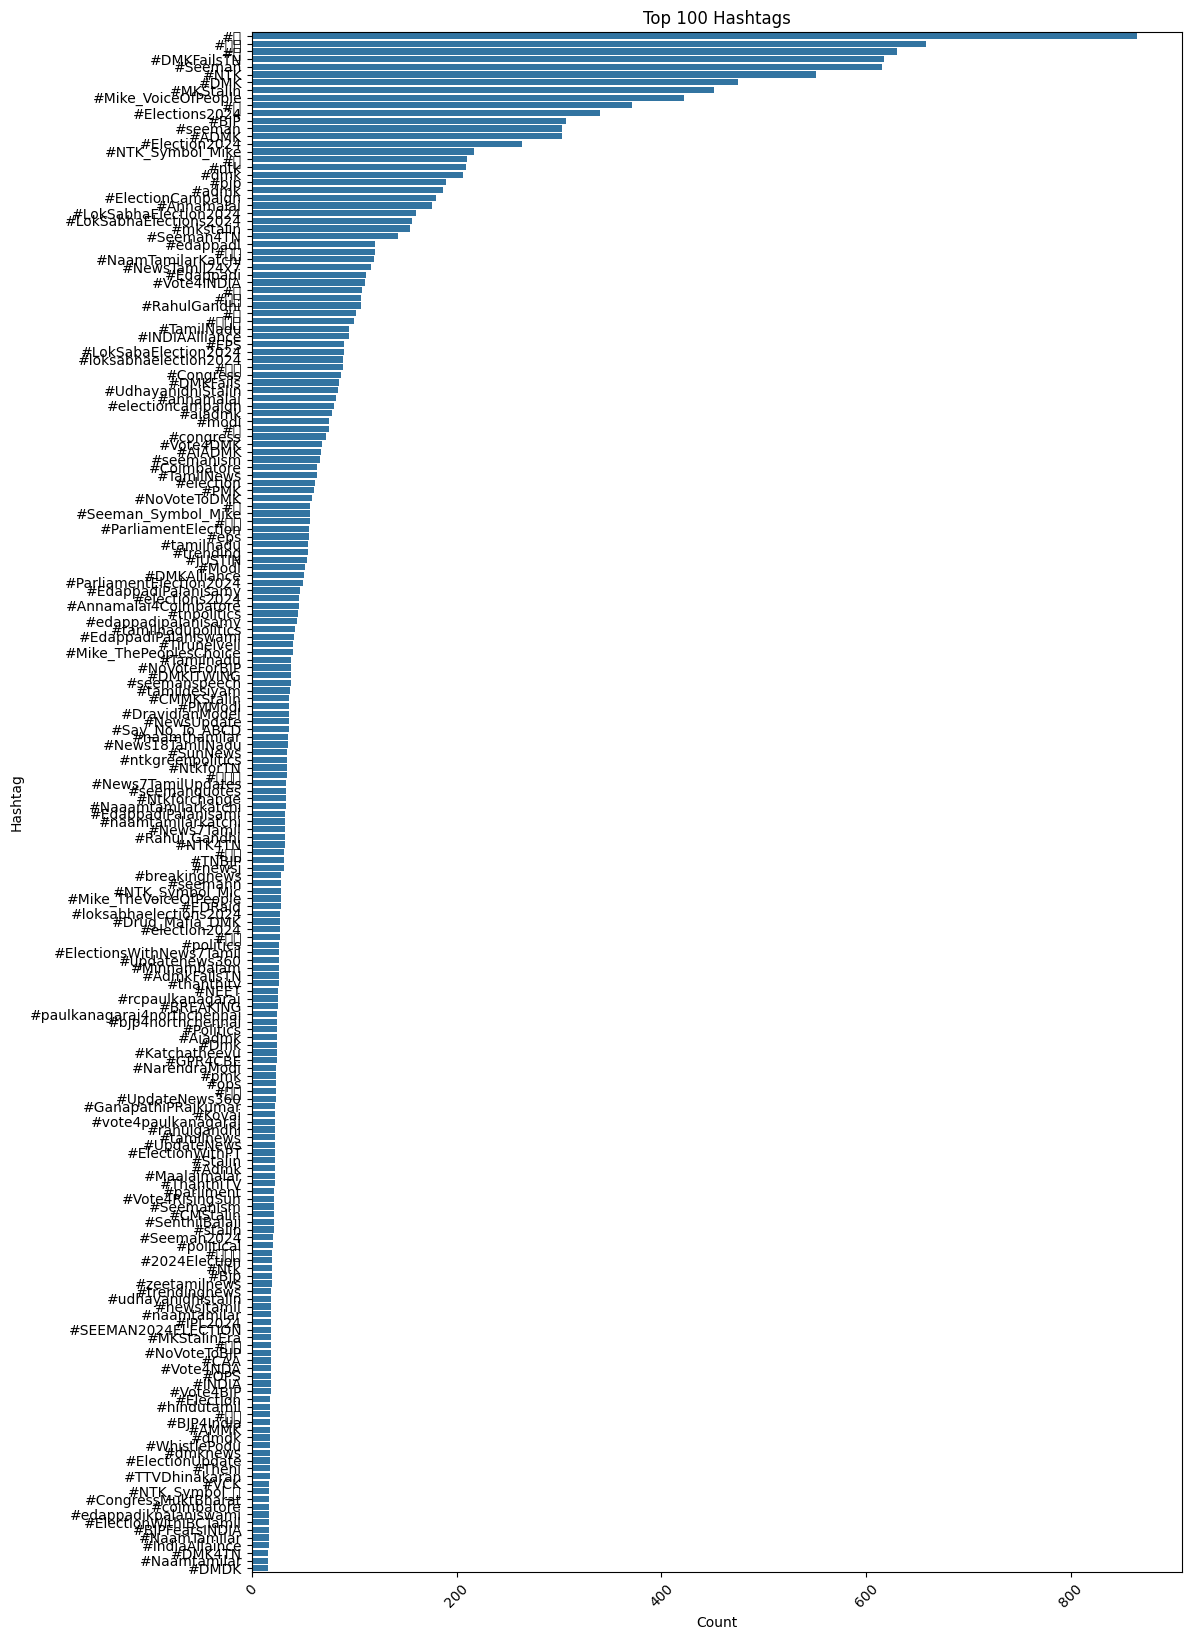

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the data
data = pd.read_csv("data/PS_train.csv")

# Extract hashtags and count their occurrences
counts = {}
for sentence in data['content']:
    words = re.findall("#\w+", sentence)
    for word in words:
        counts[word] = counts.get(word, 0) + 1

# Convert the dictionary to a DataFrame
hashtags_df = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
hashtags_df.index.name = 'hashtag'

# Sort by count in descending order
hashtags_df = hashtags_df.sort_values(by='count', ascending=False)

# Select top 100 hashtags
top_hashtags = hashtags_df.head(200)

# Create a bar plot
plt.figure(figsize=(12, 20))
sns.barplot(x='count', y='hashtag', data=top_hashtags)
plt.title("Top 100 Hashtags")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.xticks(rotation=45)
plt.show()

In [22]:
top_500 = hashtags_df.head(500)
print(list(top_500.index))

['#த', '#மக', '#ச', '#DMKFailsTN', '#Seeman', '#NTK', '#DMK', '#MKStalin', '#Mike_VoiceOfPeople', '#ந', '#Elections2024', '#BJP', '#seeman', '#ADMK', '#Election2024', '#NTK_Symbol_Mike', '#வ', '#ntk', '#dmk', '#bjp', '#admk', '#ElectionCampaign', '#Annamalai', '#LokSabhaElection2024', '#LokSabhaElections2024', '#mkstalin', '#Seeman4TN', '#edappadi', '#உப', '#NaamTamilarKatchi', '#NewsTamil24x7', '#Edappadi', '#Vote4INDIA', '#ம', '#ஒல', '#RahulGandhi', '#ப', '#நமத', '#TamilNadu', '#INDIAAlliance', '#EPS', '#LokSabaElection2024', '#loksabhaelection2024', '#தம', '#Congress', '#DMKFails', '#UdhayanidhiStalin', '#annamalai', '#electioncampaign', '#aiadmk', '#modi', '#க', '#congress', '#Vote4DMK', '#AIADMK', '#seemanism', '#Coimbatore', '#TamilNews', '#election', '#PMK', '#NoVoteToDMK', '#ஸ', '#Seeman_Symbol_Mike', '#ஒற', '#ParliamentElection', '#eps', '#tamilnadu', '#trending', '#JUSTIN', '#Modi', '#DMKAlliance', '#ParliamentElection2024', '#EdappadiPalanisamy', '#elections2024', '#Annamala